In [1]:
import turicreate as tc
import matplotlib.pyplot as plt

In [2]:
train_data = tc.image_analysis.load_images("snacks/train", with_path=True)
len(train_data)

Read 1539 images in 5.02262 secs	speed: 306.414 file/sec

Read 3127 images in 10.0228 secs	speed: 317.589 file/sec

4838

In [3]:
test_data = tc.image_analysis.load_images("snacks/test", with_path=True)
len(test_data)

952

In [4]:
import os
train_data["label"] = train_data["path"].apply(lambda path: 
                                               os.path.basename(os.path.split(path)[0]))
test_data["label"] = test_data["path"].apply(lambda path: 
                                             os.path.basename(os.path.split(path)[0]))
train_data["label"].value_counts().print_rows(num_rows=20)
test_data["label"].value_counts().print_rows(num_rows=20)

+------------+-------+
|   value    | count |
+------------+-------+
| pineapple  |  260  |
|   juice    |  250  |
|   banana   |  250  |
|   apple    |  250  |
|  doughnut  |  250  |
| watermelon |  250  |
|   waffle   |  250  |
|   muffin   |  250  |
|   salad    |  250  |
| ice cream  |  250  |
|  hot dog   |  250  |
|   grape    |  250  |
|   carrot   |  249  |
|    cake    |  249  |
|   cookie   |  249  |
|   orange   |  249  |
|   candy    |  249  |
| strawberry |  249  |
|  popcorn   |  180  |
|  pretzel   |  154  |
+------------+-------+
[20 rows x 2 columns]

+------------+-------+
|   value    | count |
+------------+-------+
|  hot dog   |   50  |
|   juice    |   50  |
|   banana   |   50  |
|   orange   |   50  |
|   cookie   |   50  |
|   carrot   |   50  |
|   waffle   |   50  |
|    cake    |   50  |
|   salad    |   50  |
| ice cream  |   50  |
|   candy    |   50  |
|   grape    |   50  |
| watermelon |   50  |
|   apple    |   50  |
|  doughnut  |   50  |
| strawberr

Run the next cell to train the model.

**OR**

Run the cell **after** the next cell, to load the model from the `starter/notebook` folder.

In [5]:
# Train the image classifier
model = tc.image_classifier.create(train_data, target="label", 
                                   model="squeezenet_v1.1",
                                   verbose=True, max_iterations=100)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 485.438ms    | 1.25%            |

| 128              | 613.899ms    | 2.5%             |

| 192              | 740.493ms    | 3.75%            |

| 256              | 867.496ms    | 5.25%            |

| 320              | 994.251ms    | 6.5%             |

| 640              | 1.62s        | 13%              |

| 1600             | 3.54s        | 32.75%           |

| 3200             | 6.74s        | 65.75%           |

| 4800             | 9.90s        | 98.5%            |

| 4838             | 10.03s       | 100%             |

+------------------+--------------+------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 4596

Number of classes           : 20

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 19019

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | NaN       | 0.137734     | 0.051567          | 0.053719            |

| 1         | 6        | 0.000015  | 0.825566     | 0.087685          | 0.086777            |

| 2         | 9        | 5.000000  | 1.314244     | 0.190383          | 0.181818            |

| 3         | 10       | 5.000000  | 1.569771     | 0.268059          | 0.210744            |

| 4         | 11       | 5.000000  | 1.803365     | 0.324630          | 0.276860            |

| 5         | 13       | 1.000000  | 2.164003     | 0.333986          | 0.260331            |

| 10        | 18       | 1.000000  | 3.359132     | 0.229112          | 0.206612            |

| 20        | 31       | 1.000000  | 6.269503     | 0.451697          | 0.396694            |

| 30        | 41       | 1.000000  | 8.693051     | 0.574630          | 0.512397            |

| 40        | 52       | 1.000000  | 11.268683    | 0.602263          | 0.504132            |

| 50        | 63       | 1.000000  | 13.841358    | 0.645779          | 0.607438            |

| 60        | 74       | 1.000000  | 16.267820    | 0.691253          | 0.607438            |

| 70        | 84       | 1.000000  | 18.614432    | 0.725631          | 0.632231            |

| 80        | 94       | 1.000000  | 20.975306    | 0.737163          | 0.619835            |

| 90        | 105      | 1.000000  | 23.398360    | 0.759574          | 0.648760            |

| 100       | 116      | 1.000000  | 25.869634    | 0.785901          | 0.640496            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Completed (Iteration limit reached).

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [6]:
# OR load HealthySnacks.model from starter/notebook folder
# model = tc.load_model("HealthySnacks.model")

Continue with trained or loaded model.

In [7]:
metrics = model.evaluate(test_data)
print("Accuracy: ", metrics["accuracy"])
print("Precision: ", metrics["precision"])
print("Recall: ", metrics["recall"])

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 489.912ms    | 6.5%             |

| 128              | 617.33ms     | 13.25%           |

| 192              | 744.593ms    | 20%              |

| 256              | 870.95ms     | 26.5%            |

| 320              | 997.23ms     | 33.25%           |

| 640              | 1.62s        | 66.5%            |

| 952              | 2.26s        | 100%             |

+------------------+--------------+------------------+

Accuracy:  0.6470588235294118
Precision:  0.6469951400317295
Recall:  0.644797619047619


In [8]:
model.predict(test_data)

dtype: str
Rows: 952
['popcorn', 'grape', 'orange', 'orange', 'orange', 'apple', 'orange', 'apple', 'watermelon', 'apple', 'apple', 'apple', 'strawberry', 'apple', 'apple', 'carrot', 'candy', 'salad', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'pineapple', 'orange', 'apple', 'apple', 'apple', 'doughnut', 'grape', 'apple', 'apple', 'orange', 'grape', 'apple', 'apple', 'apple', 'grape', 'apple', 'apple', 'grape', 'apple', 'orange', 'apple', 'apple', 'apple', 'apple', 'apple', 'banana', 'banana', 'pineapple', 'carrot', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'hot dog', 'banana', 'banana', 'banana', 'banana', 'pineapple', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'juice', 'watermelon', 'hot dog', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'banana', 'apple', 'watermelon', 'banana', 'grape', 'banana', 'orange', 'banana', 'banana'

In [9]:
output = model.classify(test_data)

In [10]:
output

class,probability
popcorn,0.22698893504653178
grape,0.6395619778024023
orange,0.26761609511752404
orange,0.7758432673255595
orange,0.3420459477488392
apple,0.9846612528759394
orange,0.3287940911250862
apple,0.47114294222867004
watermelon,0.49175382554691544
apple,0.8841196748076546


In [11]:
imgs_with_pred = test_data.add_columns(output)

In [12]:
imgs_with_pred.explore()

Materializing SFrame

In [13]:
imgs_filtered = imgs_with_pred[(imgs_with_pred["probability"] > 0.9) & (imgs_with_pred["label"] != imgs_with_pred["class"])]

In [14]:
imgs_filtered.explore()

Materializing SFrame

In [15]:
predictions = model.predict(test_data, output_type="probability_vector")
print("Probabilities for 2nd image", predictions[1])

Probabilities for 2nd image array('d', [0.2562423024370598, 0.008941414444259048, 1.0345902077256272e-05, 0.01393458938943105, 0.00424127661386408, 0.002645737612109172, 3.691855584674081e-05, 0.6395619778024023, 1.1141793237233896e-05, 6.287403500402941e-05, 4.692354069911665e-05, 2.4401796102835497e-06, 0.07288808266826105, 0.0005345314826011119, 0.00010364728423814174, 6.234492238492068e-08, 0.00028595873611663087, 4.3540272498218285e-05, 3.7826943768374993e-06, 0.0004024522113856303])


In [16]:
labels = test_data["label"].unique().sort()
preds = tc.SArray(predictions[1])

In [17]:
tc.SFrame({'preds': preds, 'labels': labels}).sort([('preds', False)])

labels,preds
grape,0.6395619778024023
apple,0.2562423024370598
orange,0.07288808266826105
candy,0.01393458938943105
banana,0.008941414444259048
carrot,0.00424127661386408
cookie,0.002645737612109172
pineapple,0.0005345314826011119
watermelon,0.0004024522113856303
salad,0.00028595873611663087


In [18]:
model200 = tc.image_classifier.create(train_data, target="label", model="squeezenet_v1.1", verbose=True, max_iterations=100)

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 612.258ms    | 1.25%            |

| 128              | 760.65ms     | 2.5%             |

| 192              | 909.677ms    | 3.75%            |

| 256              | 1.05s        | 5.25%            |

| 320              | 1.18s        | 6.5%             |

| 640              | 1.85s        | 13%              |

| 1600             | 3.78s        | 32.75%           |

| 3200             | 7.08s        | 65.75%           |

| 4800             | 10.23s       | 98.5%            |

| 4838             | 10.36s       | 100%             |

+------------------+--------------+------------------+

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Logistic regression:

--------------------------------------------------------

Number of examples          : 4586

Number of classes           : 20

Number of feature columns   : 1

Number of unpacked features : 1000

Number of coefficients      : 19019

Starting L-BFGS

--------------------------------------------------------

+-----------+----------+-----------+--------------+-------------------+---------------------+

| Iteration | Passes   | Step size | Elapsed Time | Training Accuracy | Validation Accuracy |

+-----------+----------+-----------+--------------+-------------------+---------------------+

| 0         | 1        | NaN       | 0.113581     | 0.052333          | 0.039683            |

| 1         | 6        | 0.000014  | 0.788120     | 0.098125          | 0.103175            |

| 2         | 9        | 5.000000  | 1.276621     | 0.220890          | 0.261905            |

| 3         | 10       | 5.000000  | 1.539355     | 0.227867          | 0.250000            |

| 4         | 11       | 5.000000  | 1.763243     | 0.347143          | 0.309524            |

| 5         | 13       | 1.000000  | 2.126025     | 0.355648          | 0.380952            |

| 10        | 19       | 1.000000  | 3.404055     | 0.420846          | 0.436508            |

| 20        | 30       | 1.000000  | 5.922994     | 0.470126          | 0.484127            |

| 30        | 40       | 1.000000  | 8.313481     | 0.585478          | 0.579365            |

| 40        | 50       | 1.000000  | 10.930712    | 0.624509          | 0.583333            |

| 50        | 61       | 1.000000  | 13.406267    | 0.676843          | 0.650794            |

| 60        | 73       | 1.000000  | 15.993093    | 0.711295          | 0.686508            |

| 70        | 84       | 1.000000  | 18.508687    | 0.738770          | 0.702381            |

| 80        | 94       | 1.000000  | 20.973337    | 0.752290          | 0.690476            |

| 90        | 104      | 1.000000  | 23.534034    | 0.772351          | 0.678571            |

| 100       | 114      | 1.000000  | 25.903387    | 0.788051          | 0.674603            |

+-----------+----------+-----------+--------------+-------------------+---------------------+

Completed (Iteration limit reached).

This model may not be optimal. To improve it, consider increasing `max_iterations`.

In [19]:
metrics200 = model200.evaluate(test_data)
print("Accuracy: ", metrics200["accuracy"])
print("Precision: ", metrics200["precision"])
print("Recall: ", metrics200["recall"])

Analyzing and extracting image features.

+------------------+--------------+------------------+

| Images Processed | Elapsed Time | Percent Complete |

+------------------+--------------+------------------+

| 64               | 479.266ms    | 6.5%             |

| 128              | 606.562ms    | 13.25%           |

| 192              | 733.434ms    | 20%              |

| 256              | 860.259ms    | 26.5%            |

| 320              | 990.021ms    | 33.25%           |

| 640              | 1.62s        | 66.5%            |

| 952              | 2.25s        | 100%             |

+------------------+--------------+------------------+

Accuracy:  0.6607142857142857
Precision:  0.661097688913806
Recall:  0.658610544217687


In [20]:
print("Confusion Matrix:\n", metrics["confusion_matrix"])

Confusion Matrix:
 +--------------+-----------------+-------+
| target_label | predicted_label | count |
+--------------+-----------------+-------+
|    carrot    |    watermelon   |   2   |
|    apple     |      candy      |   1   |
|  watermelon  |    ice cream    |   3   |
|  strawberry  |    strawberry   |   35  |
|    waffle    |    ice cream    |   1   |
|    candy     |      carrot     |   1   |
|    cookie    |    ice cream    |   5   |
|    grape     |      candy      |   1   |
|   pretzel    |     hot dog     |   1   |
|  ice cream   |    ice cream    |   25  |
+--------------+-----------------+-------+
[209 rows x 3 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [21]:
import numpy as np
import seaborn as sns

def compute_confusion_matrix(metrics, labels):
    num_labels = len(labels)
    label_to_index = {l:i for i, l in enumerate(labels)}
    
    conf = np.zeros((num_labels, num_labels), dtype=np.int)
    for row in metrics["confusion_matrix"]:
        true_label = label_to_index[row["target_label"]]
        pred_label = label_to_index[row["predicted_label"]]
        conf[true_label, pred_label] = row["count"]
        
    return conf

def plot_confusion_matrix(conf, labels, figsize=(8,8)):
    fig = plt.figure(figsize=figsize)
    heatmap = sns.heatmap(conf, annot=True, fmt='d')
    heatmap.xaxis.set_ticklabels(labels, rotation=45, ha="right", fontsize=12)
    heatmap.yaxis.set_ticklabels(labels, rotation=0, ha="right", fontsize=12)
    
    plt.xlabel("Predicted label", fontsize=12)
    plt.ylabel("True label", fontsize=12)
    plt.show()

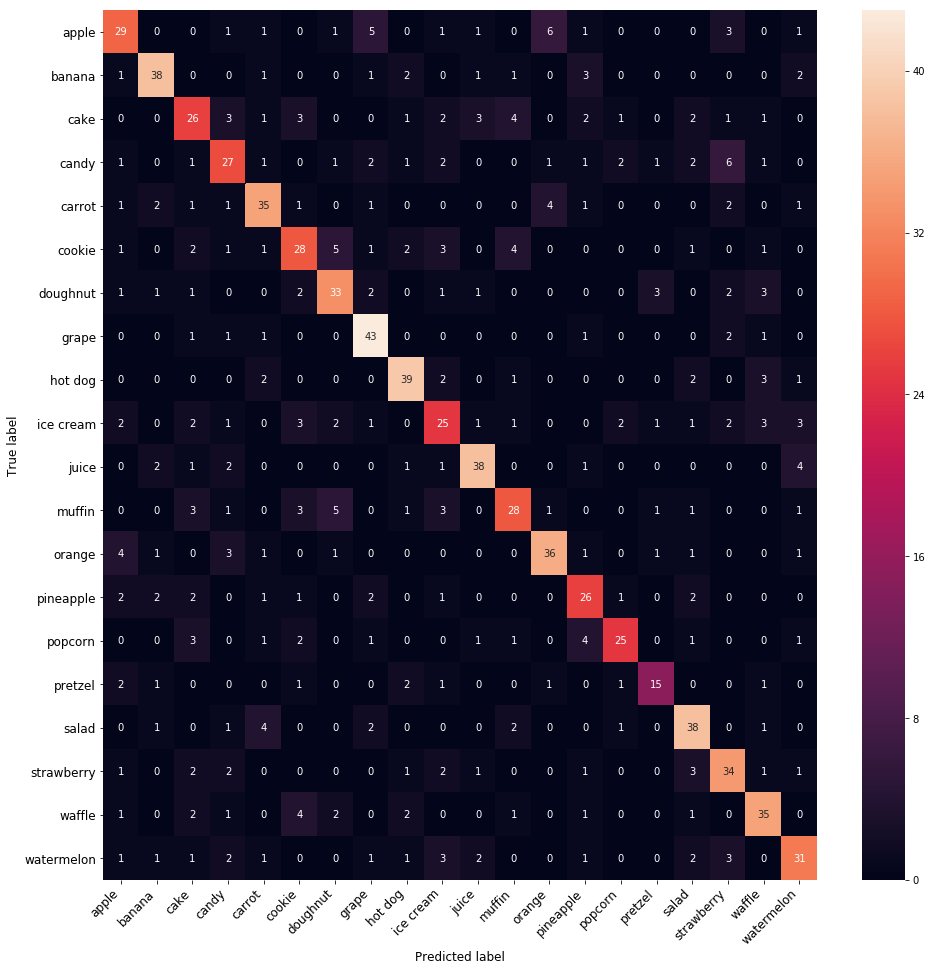

In [22]:
conf = compute_confusion_matrix(metrics200, labels)
plot_confusion_matrix(conf, labels, figsize=(16,16))

In [23]:
for i, label in enumerate(labels):
    correct = conf[i, i]
    images_per_class = conf[i].sum()
    print("%10s %.1f%%" % (label, 100. * correct/images_per_class))

     apple 58.0%
    banana 76.0%
      cake 52.0%
     candy 54.0%
    carrot 70.0%
    cookie 56.0%
  doughnut 66.0%
     grape 86.0%
   hot dog 78.0%
 ice cream 50.0%
     juice 76.0%
    muffin 58.3%
    orange 72.0%
 pineapple 65.0%
   popcorn 62.5%
   pretzel 60.0%
     salad 76.0%
strawberry 69.4%
    waffle 70.0%
watermelon 62.0%


In [24]:
val_data = tc.image_analysis.load_images("snacks/val", with_path=True)
val_data["label"] = val_data["path"].apply(lambda path: os.path.basename(os.path.split(path)[0]))
len(val_data)

Read 393 images in 5.01545 secs	speed: 78.3579 file/sec

Read 858 images in 10.052 secs	speed: 92.3255 file/sec

955

In [25]:
extracted_train_features = tc.SFrame("extracted_train_features.sframe")
extracted_val_features = tc.SFrame("extracted_val_features.sframe")

In [26]:
from turicreate.toolkits import _pre_trained_models
from turicreate.toolkits import _image_feature_extractor

ptModel = _pre_trained_models.MODELS["squeezenet_v1.1"]()
feature_extractor = _image_feature_extractor.MXFeatureExtractor(ptModel)

Download completed: /var/folders/00/5fdtjnvs5mb9z49txltpglq40000gn/T/model_cache/squeezenet_v1.1-symbol.json
Download completed: /var/folders/00/5fdtjnvs5mb9z49txltpglq40000gn/T/model_cache/squeezenet_v1.1-0000.params


In [27]:
train_features = feature_extractor.extract_features(train_data, "image", verbose=True)

Performing feature extraction on resized images...
Completed   64/4838
Completed  128/4838
Completed  192/4838
Completed  256/4838
Completed  320/4838
Completed  384/4838
Completed  448/4838
Completed  512/4838
Completed  576/4838
Completed  640/4838
Completed  704/4838
Completed  768/4838
Completed  832/4838
Completed  896/4838
Completed  960/4838
Completed 1024/4838
Completed 1088/4838
Completed 1152/4838
Completed 1216/4838
Completed 1280/4838
Completed 1344/4838
Completed 1408/4838
Completed 1472/4838
Completed 1536/4838
Completed 1600/4838
Completed 1664/4838
Completed 1728/4838
Completed 1792/4838
Completed 1856/4838
Completed 1920/4838
Completed 1984/4838
Completed 2048/4838
Completed 2112/4838
Completed 2176/4838
Completed 2240/4838
Completed 2304/4838
Completed 2368/4838
Completed 2432/4838
Completed 2496/4838
Completed 2560/4838
Completed 2624/4838
Completed 2688/4838
Completed 2752/4838
Completed 2816/4838
Completed 2880/4838
Completed 2944/4838
Completed 3008/4838
Completed

In [28]:
extracted_train_features = tc.SFrame({"label": train_data["label"], '__image_features__': train_features,})

In [29]:
extracted_train_features.save("extracted_train_features.sframe")

In [30]:
extracted_train_features.head()

__image_features__,label
"[6.1337385177612305,10.12844181060791, ...",apple
"[9.666999816894531,14.665328025817871, ...",apple
"[10.662524223327637,15.472965240478516, ...",apple
"[12.159001350402832,11.231389045715332, ...",apple
"[17.9743709564209,19.089576721191406, ...",apple
"[5.879778861999512,9.116369247436523, ...",apple
"[6.7489848136901855,6.330108642578125, ...",apple
"[5.711240291595459,13.054986000061035, ...",apple
"[8.625852584838867,6.533729553222656, ...",apple
"[6.440614700317383,13.472396850585938, ...",apple


In [31]:
from turicreate.toolkits.image_classifier import ImageClassifier

    'classifier': lr_model,
    'model': ptModel.name,
    'max_iterations': lr_model.max_iterations,
    'feature_extractor': feature_extractor,
    'input_image_shape': ptModel.input_image_shape,
    'target': lr_model.target,
    'feature': "image",
    'num_features': 1,
    'num_classes': lr_model.num_classes,
    'classes': lr_model.classes,
    'num_examples': lr_model.num_examples,
    'training_time': lr_model.training_time,
    'training_loss': lr_model.training_loss,
}
model = ImageClassifier(state)

IndentationError: unexpected indent (<ipython-input-31-d452f80b75ff>, line 3)

In [ ]:
lr_model = tc.logistic_classifier.create(extracted_train_features,
                             features=['__image_features__'],
                             target="label",
                             validation_set=extracted_val_features,
                             max_iterations=200,
                             seed=None,
                             verbose=True,
                             l2_penalty=10.0,
                             l1_penalty=0.0,
                             convergence_threshold=1e-8)

In [ ]:
from turicreate.toolkits.image_classifier import ImageClassifier

state = {
    'classifier': lr_model,
    'model': ptModel.name,
    'max_iterations': lr_model.max_iterations,
    'feature_extractor': feature_extractor,
    'input_image_shape': ptModel.input_image_shape,
    'target': lr_model.target,
    'feature': "image",
    'num_features': 1,
    'num_classes': lr_model.num_classes,
    'classes': lr_model.classes,
    'num_examples': lr_model.num_examples,
    'training_time': lr_model.training_time,
    'training_loss': lr_model.training_loss,
}
model = ImageClassifier(state)

In [ ]:
model.save("HealtySnacks_regularized.model")

In [ ]:
model.export_coreml("HealthySnacks_regulized.mlmodel")

In [ ]:
model

In [ ]:
model.classifier

In [ ]:
model300 = tc.image_classifier.create(train_data, target="label", model="resnet-50", verbose=True, max_iterations=200)

In [ ]:
metrics300 = model300.evaluate(test_data)
print("Accuracy: ", metrics300["accuracy"])
print("Precision: ", metrics300["precision"])
print("Recall: ", metrics300["recall"])